Epoch [1/100], Loss: 1.3862940076380799
Epoch [2/100], Loss: 1.3862838489187639
Epoch [3/100], Loss: 1.3862826083339541
Epoch [4/100], Loss: 1.3862878144797632
Epoch [5/100], Loss: 1.386286018931933
Epoch [6/100], Loss: 1.3862854878781206
Epoch [7/100], Loss: 1.3862826601933624
Epoch [8/100], Loss: 1.3862811050846078
Epoch [9/100], Loss: 1.386289119720459
Epoch [10/100], Loss: 1.3862766599924552
Epoch [11/100], Loss: 1.3862753166990764
Epoch [12/100], Loss: 1.3862807831521762
Epoch [13/100], Loss: 1.386276827693659
Epoch [14/100], Loss: 1.386271415793963
Epoch [15/100], Loss: 1.3862709844179746
Epoch [16/100], Loss: 1.386274799788739
Epoch [17/100], Loss: 1.3862707402746557
Epoch [18/100], Loss: 1.3862704957945873
Epoch [19/100], Loss: 1.386265753689459
Epoch [20/100], Loss: 1.3862715343297538
Epoch [21/100], Loss: 1.3862685177285792
Epoch [22/100], Loss: 1.386266510365373
Epoch [23/100], Loss: 1.3862688386507627
Epoch [24/100], Loss: 1.3862648838657443
Epoch [25/100], Loss: 1.38626497

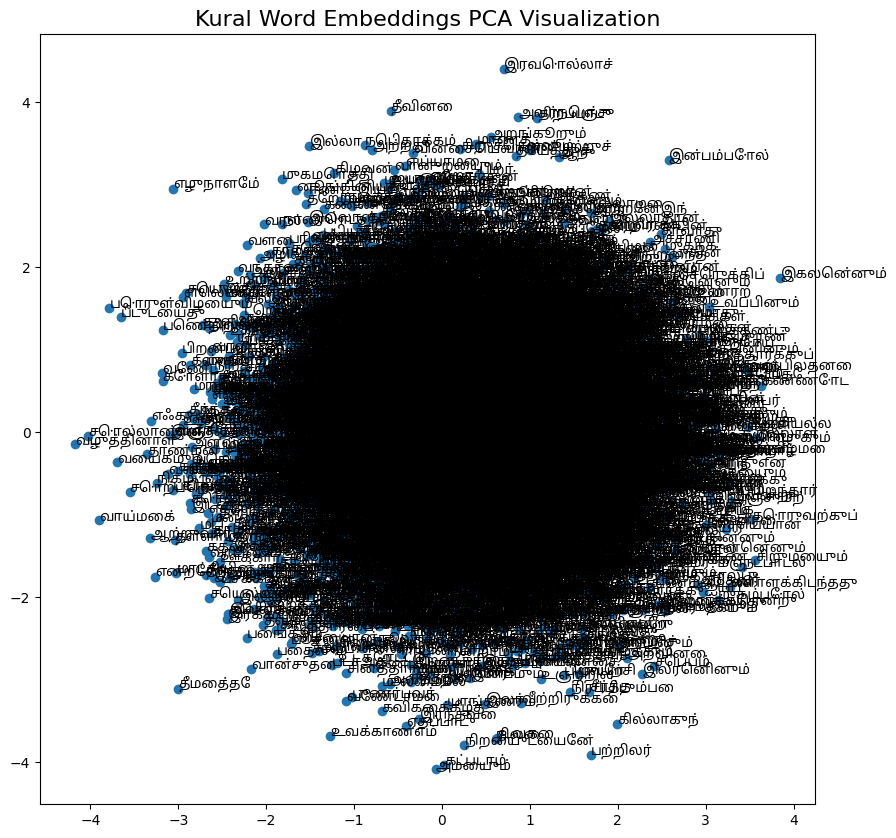

In [1]:
import json
from sklearn.decomposition import PCA
from train_model import process
import matplotlib.pyplot as plt
from kural_token import get_token
from matplotlib import font_manager

# Get the words (vocabulary) and the corresponding model
words = list(get_token().keys())
kuralModel = process("KuralNNModel")

# Step 1: Access the learned word embeddings from the embedding layer
word_embeddings = kuralModel.in_embeddings.weight.data.cpu().numpy()

# Step 2: Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(word_embeddings)

# Step 3: Set Tamil-compatible font
# Change this to a Tamil font available on your system (e.g., Noto Sans Tamil, Latha)
font_path = 'font.ttf'  # Change to your font path
prop = font_manager.FontProperties(fname=font_path)

# Step 4: Create a scatter plot of the words in the 2D space
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1])

# Step 5: Annotate the words at the corresponding points with Tamil font
data = []
for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings_pca[i, 0], reduced_embeddings_pca[i, 1]), fontproperties=prop)
    data.append({"word": word, "x": float(reduced_embeddings_pca[i, 0]), "y": float(reduced_embeddings_pca[i, 1])})

with open("word_embeddings.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

# Show the plot
plt.title("Kural Word Embeddings PCA Visualization", fontsize=16)
plt.show()
